In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

transform = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=len(train_dataset), shuffle=False)

test_dataset = datasets.MNIST(root="./data", train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

train_images, train_labels = next(iter(train_loader))
test_images, test_labels = next(iter(test_loader))

print('Train images:', train_images.shape)
print('Train labels', train_labels.shape)
print('Test images:', test_images.shape)
print('Test labels:', test_labels.shape)

Train images: torch.Size([60000, 1, 28, 28])
Train labels torch.Size([60000])
Test images: torch.Size([10000, 1, 28, 28])
Test labels: torch.Size([10000])


2D shape: (60000, 2)


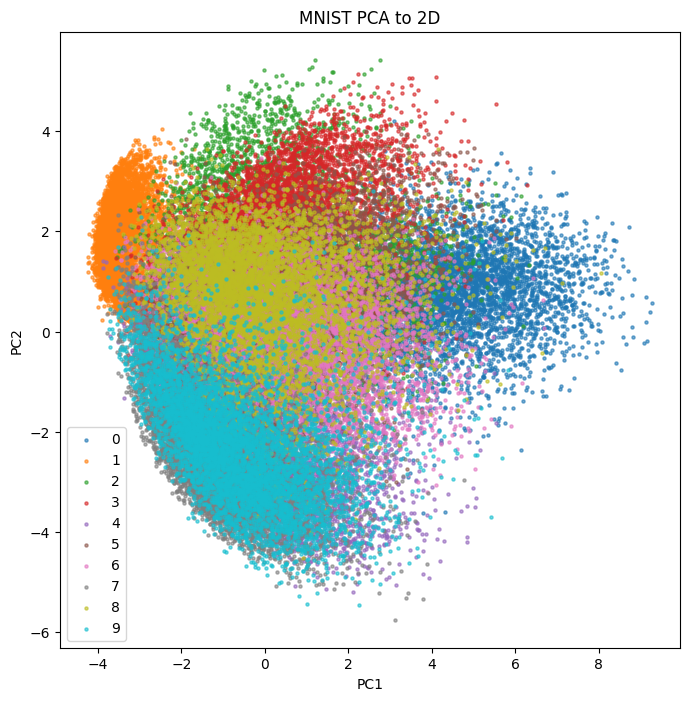

In [43]:
from sklearn.decomposition import PCA

X = train_images.view(train_images.size(0), -1).numpy()
y = train_labels.numpy()

pca = PCA(n_components=2)
X2 = pca.fit_transform(X)
print("2D shape:", X2.shape)

plt.figure(figsize=(8, 8))

for digit in range(10):
    mask = y == digit
    plt.scatter(
        X2[mask, 0], X2[mask, 1],
        s=5, label=str(digit), alpha=0.6
    )

plt.title("MNIST PCA to 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()


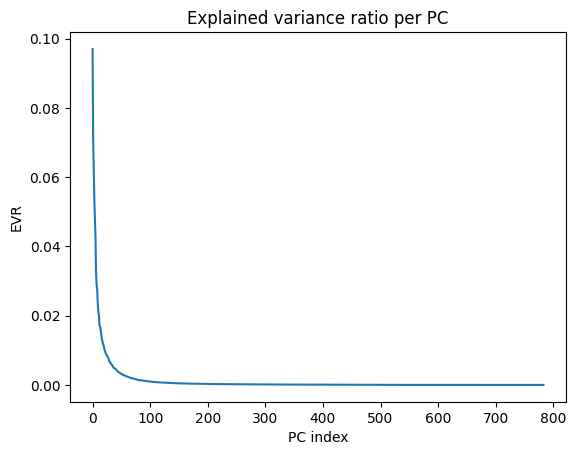

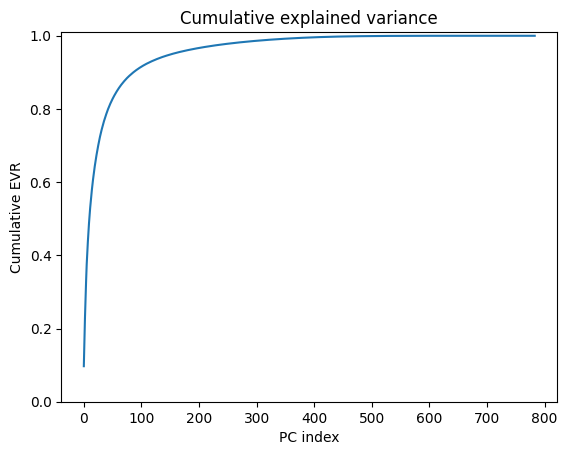

Variance captured by 2 PCs: 0.168
Variance captured by 50 PCs: 0.825


In [44]:
# Fit more PCs to see variance captured
pca = PCA(n_components=784, svd_solver="randomized", random_state=0).fit(X)

evr = pca.explained_variance_ratio_
cum = evr.cumsum()

plt.figure()
plt.plot(evr)
plt.title("Explained variance ratio per PC")
plt.xlabel("PC index")
plt.ylabel("EVR")
plt.show()

plt.figure()
plt.plot(cum)
plt.title("Cumulative explained variance")
plt.xlabel("PC index")
plt.ylabel("Cumulative EVR")
plt.ylim(0, 1.01)
plt.show()

print(f"Variance captured by 2 PCs: {cum[1]:.3f}")
print(f"Variance captured by 50 PCs: {cum[49]:.3f}")


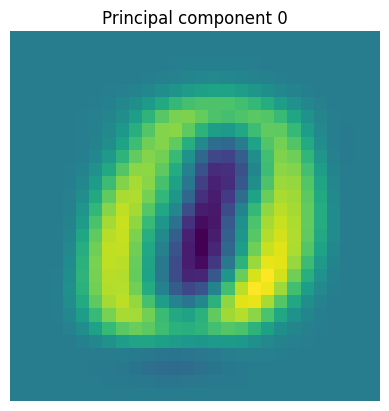

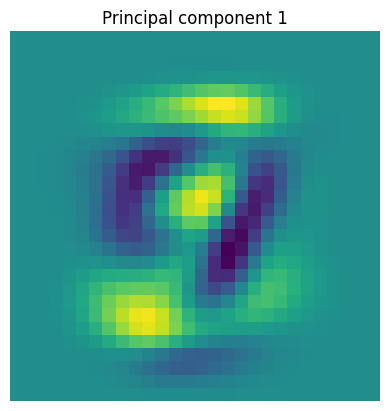

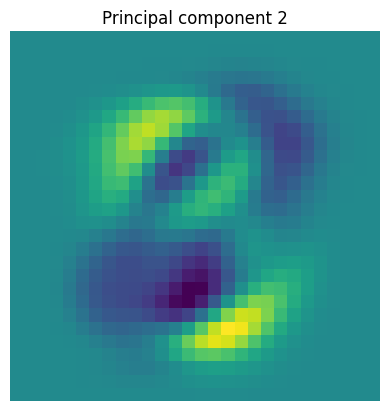

In [14]:
def show_pc(pc_idx):
    comp = pca.components_[pc_idx].reshape(28, 28)
    plt.figure()
    plt.imshow(comp, interpolation="nearest")
    plt.title(f"Principal component {pc_idx}")
    plt.axis("off")
    plt.show()

show_pc(0)
show_pc(1)
show_pc(2)


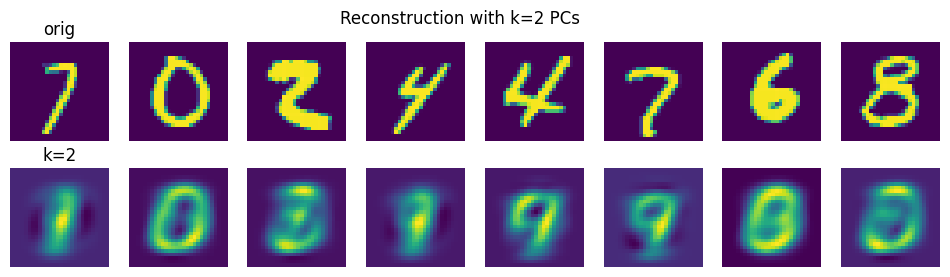

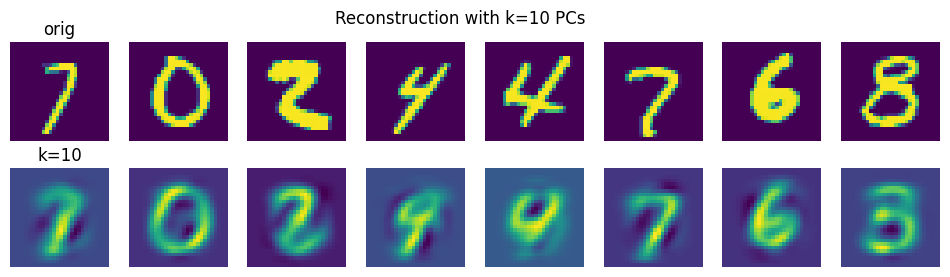

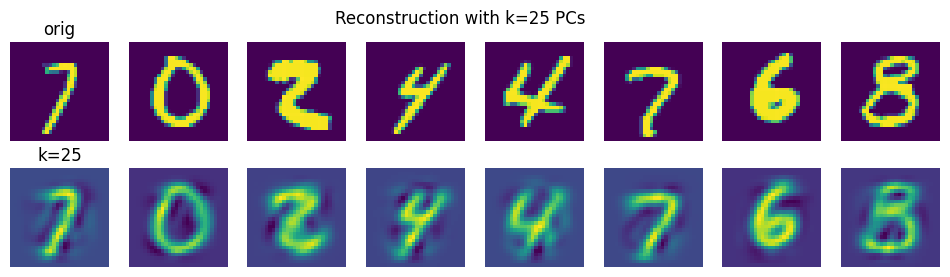

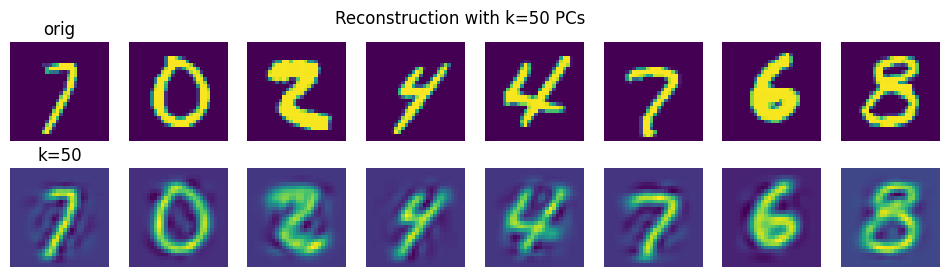

In [15]:
def reconstruct(samples, k):
    # Project → back-project using first k components
    comps = pca.components_[:k]
    mean = pca.mean_
    Z = (samples - mean) @ comps.T
    Xhat = Z @ comps + mean
    return Xhat

# Take a small batch to visualize
idx = np.random.choice(len(X), size=8, replace=False)
orig = X[idx]

for k in [2, 10, 25, 50]:
    rec = reconstruct(orig, k)
    fig, axes = plt.subplots(2, 8, figsize=(12, 3))
    for i in range(8):
        axes[0, i].imshow(orig[i].reshape(28, 28), interpolation="nearest")
        axes[0, i].axis("off")
        axes[0, i].set_title("orig" if i == 0 else "")
        axes[1, i].imshow(rec[i].reshape(28, 28), interpolation="nearest")
        axes[1, i].axis("off")
        axes[1, i].set_title(f"k={k}" if i == 0 else "")
    fig.suptitle(f"Reconstruction with k={k} PCs")
    plt.show()
